In [2]:
from lda import guidedlda as glda
import numpy as np

**Importing Clean Corpus**

In [3]:
import joblib
clean_corpus=joblib.load(r"C:\Users\LENOVO\Desktop\cs_concept.job")

In [4]:
import joblib
whole_corpus=joblib.load(r"C:\Users\LENOVO\Desktop\cs_concept_noisy.job")

In [5]:
import pandas as pd
labeled_corpus=pd.read_csv(r"C:\Users\LENOVO\Desktop\cs_gs.csv")
freq=labeled_corpus['freq']
terms=labeled_corpus['term']
label=labeled_corpus['label']

In [6]:
import gensim
from gensim import corpora
dictionary=whole_corpus['dict']
docs=whole_corpus['docs']
doc_term_matrix = [dictionary.doc2bow(rev) for rev in docs]

**Creating Document Dictionary and Document-Term Matrix**

In [7]:
id2word = [[i,dictionary[i]] for i in range(len(dictionary))]
print(id2word)

[[0, 'analysis'], [1, 'artificial'], [2, 'artificial_bee_colony'], [3, 'color_information'], [4, 'cross_validation'], [5, 'explaining'], [6, 'handle'], [7, 'increase'], [8, 'linear_discriminant'], [9, 'method'], [10, 'neural_networks'], [11, 'novel'], [12, 'objective'], [13, 'principal_component'], [14, 'proposed_method'], [15, 'recall_rate'], [16, 'repetition'], [17, 'result'], [18, 'state-of-the-art'], [19, 'support_vector_machines'], [20, 'total'], [21, 'vector_machine'], [22, 'vision'], [23, 'accident'], [24, 'clinical_data'], [25, 'graphic'], [26, 'healthy_subjects'], [27, 'movement'], [28, 'present_study'], [29, 'purpose'], [30, 'quantify'], [31, 'smoothness'], [32, 'subject'], [33, 'subjects'], [34, 'viewing'], [35, 'virtual'], [36, 'amounts'], [37, 'assists'], [38, 'data_entry'], [39, 'example'], [40, 'export'], [41, 'extraction'], [42, 'implement'], [43, 'input'], [44, 'limitation'], [45, 'link'], [46, 'management_system'], [47, 'moving'], [48, 'occupancy'], [49, 'operating'],

In [8]:
dtm=[]
for i in range(len(docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  dtm.append(doc_counts)

In [9]:
dtm=np.array(dtm)
print(dtm.shape)
print(dtm.sum())

(5746, 8261)
102103


In [10]:
print(len(dictionary))
print(len(docs))

8261
5746


**Computing TF-IDF of Core Concepts**

In [11]:
terms_list=[]
for term in terms:
    terms_list.append(term)

In [12]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))
print(vocab)

('analysis', 'artificial', 'artificial_bee_colony', 'color_information', 'cross_validation', 'explaining', 'handle', 'increase', 'linear_discriminant', 'method', 'neural_networks', 'novel', 'objective', 'principal_component', 'proposed_method', 'recall_rate', 'repetition', 'result', 'state-of-the-art', 'support_vector_machines', 'total', 'vector_machine', 'vision', 'accident', 'clinical_data', 'graphic', 'healthy_subjects', 'movement', 'present_study', 'purpose', 'quantify', 'smoothness', 'subject', 'subjects', 'viewing', 'virtual', 'amounts', 'assists', 'data_entry', 'example', 'export', 'extraction', 'implement', 'input', 'limitation', 'link', 'management_system', 'moving', 'occupancy', 'operating', 'outside', 'package', 'practitioner', 'processing', 'record', 'researcher', 'spatial', 'spatial_distribution', 'tags', 'toolbox', '2016', 'catchment', 'characteristic', 'conservation', 'copyright', 'cross', 'discover', 'entropy', 'geology', 'groundwater', 'guide', 'heterogeneous_environme

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
#compute TFIDF of terms
tfidf=[]
for i in range(len(dictionary)):
    tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i]))
print(tfidf)

[0.9290144335182324, 0.8266044922097722, 1.391114877133519, 0.6955574385667594, 0.9484874162273993, 0.8025662752693379, 0.7480523395906659, 0.8057447555674342, 0.9563914780292943, 1.0582751062729647, 1.035607741866064, 0.7083199603753239, 0.6955574385667594, 0.8641774236738526, 0.8763598308547551, 0.9274099180890126, 0.8942881353001193, 0.8369199212269294, 0.772582255589253, 0.8536386746046594, 0.7459601515063797, 0.8971682903252405, 0.8239321336042487, 0.8694467982084494, 0.8346689262801114, 0.7760351587315085, 1.1592623976112657, 0.8578541742323367, 0.7949227869334394, 0.7190031949229424, 0.7809767731275896, 1.0930188320334793, 0.8832475410371549, 0.6955574385667594, 0.7490618569180486, 0.7651131824234354, 0.711733192952033, 0.6955574385667594, 1.391114877133519, 0.7469895026861325, 0.6955574385667594, 0.9251589231421946, 0.7486534262436113, 0.934655308074083, 0.7495231019038356, 0.8316447635037342, 0.9677320884407088, 0.881039422184562, 1.8084493402735746, 0.9301537344147197, 0.7271

In [14]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [15]:
#determining term counts of core concepts
core_concepts=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']
core_concepts_counts={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_counts[core_concept]=word_counts[index]
print(core_concepts_counts)

{'data_structures': 223, 'cryptography': 727, 'software_engineering': 546, 'computer_graphics': 141, 'network_security': 354, 'computer_programming': 259, 'algorithm_design': 237, 'operating_systems': 158, 'distributed_computing': 258, 'machine_learning': 291}


In [16]:
#determining TF-IDF of core concepts
core_concepts_tfidf={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_tfidf[core_concept]=tfidf[index]
print(core_concepts_tfidf)

{'data_structures': 0.9017983069789963, 'cryptography': 2.5538901911011824, 'software_engineering': 2.098200892030114, 'computer_graphics': 1.886030746882944, 'network_security': 2.1984583326127933, 'computer_programming': 1.7322055441229876, 'algorithm_design': 1.7725496015088387, 'operating_systems': 0.7906336352053813, 'distributed_computing': 2.5275185795806188, 'machine_learning': 3.212812930522651}


In [17]:
seed_topics=[['data_structures', 'binary_search_tree', 'data_retrieval','graphs'],
                   ['cryptography', 'cypher', 'hash','encryption_key'], 
                   ['software_engineering', 'software_environment', 'software_module', 'malwares'],
                   ['computer_graphics', 'graph_partitioning', 'digital_image_processing', 'binary_image'],
                   ['network_security', 'network_lifetime', 'channel_attack', 'relay_networks'],
                   ['computer_programming','programming_approach','function_calls','debugging'],
                   ['algorithm_design','continuous_optimization','inference_algorithm','linearized_model'],
                   ['operating_systems','robust_system','virtual_platform','android'],
                   ['distributed_computing','web_service','gpu_parallel_computing','cloud_computing_platform'],
                   ['machine_learning','statistical_learning','unsupervised_approach','deep_learning_algorithm']]

**Visualizing Terms Measure**

In [18]:
import pandas as pd
df_terms=pd.DataFrame(vocab,columns=['terms'])
df_terms['frequency']=freq
df_terms['TF-IDF']=tfidf
print(df_terms)

                            terms  frequency    TF-IDF
0                        analysis          3  0.929014
1                      artificial         10  0.826604
2           artificial_bee_colony          5  1.391115
3               color_information          4  0.695557
4                cross_validation          4  0.948487
...                           ...        ...       ...
8256                         makd          6  2.086672
8257                        simit          3  2.434451
8258              memory_contents          8  1.043336
8259  computer_network_technology          3  0.869447
8260                  word_clouds         12  2.782230

[8261 rows x 3 columns]


In [19]:
filtered_terms=[]
for i in range(len(vocab)):
    if tfidf[i]>3.3:
        filtered_terms.append(vocab[i])
print(filtered_terms)

['operating_system', 'multi-proxy_signature', 'uncertainty_measures', 'scoping', 'sanger', 'secondary_studies', 'technical_debt', 'ontology_matching', 'socialbots', 'owl_ontologies', 'geoweb', 'grinding', 'security_game', 'electronic_voting', 'mocas', 'command_queue', 'pretreatment', 'mechatronic_system', 'flame', 'faulty_element', 'lisa', 'memif', 'z-wave']


**Filtering Terms**

In [20]:
#Determining the most general terms
tfidf_max= 3.3 
general_words_ids = []
for i in range(len(dictionary)):
    general_words_ids += [id for id,value in enumerate(tfidf) if (value > tfidf_max)]
#Filter Out of the Dictionary
#dictionary.filter_tokens(bad_ids=general_words_ids)


In [21]:
# Filtering low-frequent terms
dictionary.filter_extremes(no_below=2, no_above=1.0)

In [22]:
print(len(dictionary))

8261


**Computing New Document-Term distribution after Filtering**

In [23]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))
print(vocab)

('analysis', 'artificial', 'artificial_bee_colony', 'color_information', 'cross_validation', 'explaining', 'handle', 'increase', 'linear_discriminant', 'method', 'neural_networks', 'novel', 'objective', 'principal_component', 'proposed_method', 'recall_rate', 'repetition', 'result', 'state-of-the-art', 'support_vector_machines', 'total', 'vector_machine', 'vision', 'accident', 'clinical_data', 'graphic', 'healthy_subjects', 'movement', 'present_study', 'purpose', 'quantify', 'smoothness', 'subject', 'subjects', 'viewing', 'virtual', 'amounts', 'assists', 'data_entry', 'example', 'export', 'extraction', 'implement', 'input', 'limitation', 'link', 'management_system', 'moving', 'occupancy', 'operating', 'outside', 'package', 'practitioner', 'processing', 'record', 'researcher', 'spatial', 'spatial_distribution', 'tags', 'toolbox', '2016', 'catchment', 'characteristic', 'conservation', 'copyright', 'cross', 'discover', 'entropy', 'geology', 'groundwater', 'guide', 'heterogeneous_environme

In [24]:
new_docs=[]
for doc in docs:
    new_doc=[]
    for word in doc:
        if(word in vocab):
            new_doc.append(word)
    new_docs.append(new_doc)

In [25]:
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)

In [26]:
new_dtm=np.array(new_dtm)
print(new_dtm.shape)
print(new_dtm.sum())

(5746, 8261)
102103


**Creating Seeded LDA Model**

In [27]:
seed_topic_list = [['data_structures', 'binary_search_tree', 'data_retrieval','graphs'],
                   ['cryptography', 'cypher', 'hash','encryption_key'], 
                   ['software_engineering', 'software_environment', 'software_module', 'malwares'],
                   ['computer_graphics', 'graph_partitioning', 'digital_image_processing', 'binary_image'],
                   ['network_security', 'network_lifetime', 'channel_attack', 'relay_networks'],
                   ['computer_programming','programming_approach','function_calls','debugging'],
                   ['algorithm_design','continuous_optimization','inference_algorithm','linearized_model'],
                   ['operating_systems','robust_system','virtual_platform','android'],
                   ['distributed_computing','web_service','gpu_parallel_computing','cloud_computing_platform'],
                   ['machine_learning','statistical_learning','unsupervised_approach','deep_learning_algorithm']]

In [28]:
model = glda.GuidedLDA(n_topics=10, n_iter=100, random_state=7, refresh=20)

In [29]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [30]:
seed_topics = {}
for t_id, st in enumerate(seed_topic_list):
     for word in st:
         seed_topics[word2id[word]] = t_id

In [31]:
print(seed_topics)

{353: 0, 6235: 0, 1056: 0, 3897: 0, 639: 1, 7526: 1, 3511: 1, 3808: 1, 1282: 2, 6109: 2, 4550: 2, 6231: 2, 2440: 3, 7277: 3, 1030: 3, 4692: 3, 898: 4, 1615: 4, 8198: 4, 6994: 4, 1966: 5, 6025: 5, 7236: 5, 1340: 5, 438: 6, 3107: 6, 7758: 6, 1159: 6, 530: 7, 3564: 7, 7825: 7, 1888: 7, 2697: 8, 4314: 8, 6352: 8, 6451: 8, 605: 9, 5808: 9, 4389: 9, 5171: 9}


In [32]:
model.fit(new_dtm, seed_topics=seed_topics, seed_confidence=0.7)

INFO:lda:n_documents: 5746
INFO:lda:vocab_size: 8261
INFO:lda:n_words: 102103
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1346729
INFO:lda:<20> log likelihood: -921178
INFO:lda:<40> log likelihood: -901042
INFO:lda:<60> log likelihood: -889592
INFO:lda:<80> log likelihood: -881462
INFO:lda:<99> log likelihood: -875577


**Topic-Word Distributions (Top 20 Words)**

In [33]:
print(len(vocab))

8261


In [34]:
print(len(dictionary))

8261


In [35]:
n_top_words = 20
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
     topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
     print('Topic {}: {}'.format(i, ' '.join(topic_words)))

Topic 0: result present analysis 2016 data_structures operating propose relational technique processing implement operation parallel data 2015 paper_presents running elsevier_b.v._all_rights query method
Topic 1: cryptography propose result present encryption secure 2016 term analysis quanta method uses proposed_scheme complexity computational furthermore sons et_al. john_wiley ltd.
Topic 2: engineering result software_engineering present method 2016 analysis software help learning challenge elsevier_b.v._all_rights paper_presents requirement researcher technique developer benefit future form
Topic 3: propose present ltd. john_wiley sons copyright analysis finally internet result relational network_security method foci technique 2016 uses threat attacker detecting
Topic 4: result method machine 2016 learning analysis elsevier_ltd._all_rights elsevier_b.v._all_rights processing 2017 present proposed_method vision characteristic image propose mean resulting extraction imaging
Topic 5: le

**Saving Seeded LDA Model**

In [36]:
from six.moves import cPickle as pickle
with open('guidedlda_model.pickle', 'wb') as file_handle:
     pickle.dump(model, file_handle)

**Evaluation**

In [37]:
beta=model.topic_word_
theta=model.transform(new_dtm)
logs=model.loglikelihoods_
print(logs)

[-1346728.7302988248, -921178.2147164315, -901041.9159765346, -889591.5758010605, -881461.6313273335]


In [38]:
theta=np.asarray(theta)
print(theta.shape)
docs_length=[]
for doc in docs:
  docs_length.append(len(doc))

(5746, 10)


In [39]:
from sklearn import preprocessing
normalized_theta=preprocessing.normalize(theta, norm='l2')
  

**Computing Term Frequency of Core Concepts**

In [40]:
#Compute term_frequency
topic_freq= (theta.T * docs_length).T.sum()
term_topic_freq = (beta.T * topic_freq).T
term_frequency = np.sum(term_topic_freq, axis=0)
print(term_frequency)

[10853.402866     838.4715473     62.49317342 ...    35.18192998
    51.82280905    17.79839592]


In [41]:
core_concepts=['data_structures','cryptography','software_engineering','computer_graphics','network_security','computer_programming','algorithm_design','operating_systems','distributed_computing','machine_learning']
core_concepts_freq={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_freq[core_concept]=term_frequency[index]
print(core_concepts_freq)

{'data_structures': 2170.9594421185097, 'cryptography': 2874.2643815093174, 'software_engineering': 2064.267046896593, 'computer_graphics': 621.1158912365482, 'network_security': 1713.0756229318965, 'computer_programming': 1520.8544001406046, 'algorithm_design': 1062.6952794151662, 'operating_systems': 1989.332904890316, 'distributed_computing': 677.8755327137357, 'machine_learning': 674.0698636156336}


**Computing Saliency of Core Concepts**

In [42]:
# compute the distinctiveness and saliency of the terms:
# this determines the R terms that are displayed when no topic is selected
term_proportion = term_frequency / term_frequency.sum()
topic_proportion = (topic_freq / topic_freq.sum())
topic_given_term = beta /beta.sum()
kernel = (topic_given_term* np.log((topic_given_term.T / topic_proportion).T))
distinctiveness = kernel.sum()
saliency = term_proportion * distinctiveness

In [43]:
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
#computing tf-idf after filtering
tfidf=[]
for i in range(len(dictionary)):
    tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i])) 

In [44]:
new_docs=[]
for doc in docs:
    new_doc=[]
    for word in doc:
        if(word in vocab):
            new_doc.append(word)
    new_docs.append(new_doc)
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)
new_dtm=np.array(new_dtm)

In [45]:
#determining measures of all terms
terms_saliency={}
for term in vocab:
    index=word2id[term]
    terms_saliency[term]=saliency[index]
df_terms=pd.DataFrame(vocab,columns=['Terms'])
df_terms['TF-IDF']=tfidf
df_terms['term counts']=word_counts
df_terms['Saliency']=terms_saliency.values()
print(df_terms)

                            Terms    TF-IDF  term counts  Saliency
0                        analysis  0.929014         1158 -0.078970
1                      artificial  0.826604           82 -0.006101
2           artificial_bee_colony  1.391115           12 -0.000455
3               color_information  0.695557            4 -0.000319
4                cross_validation  0.948487           15 -0.000808
...                           ...       ...          ...       ...
8256                         makd  2.086672            6 -0.000219
8257                        simit  2.434451            7 -0.000160
8258              memory_contents  1.043336            3 -0.000256
8259  computer_network_technology  0.869447            5 -0.000377
8260                  word_clouds  2.782230            8 -0.000130

[8261 rows x 4 columns]


In [46]:
row_0=df_terms.loc[0]
row_0=list(row_0)
print(abs(row_0[3]))

0.07896990068352713


In [47]:
ids=[]
low_salient=[]
for i in range(len(vocab)):
    row=df_terms.loc[i]
    row=list(row)
    saliency_val=row[3]
    if(abs(saliency_val)<0.00035):
        ids.append(i)
for i in ids:
    term=id2word[i]
    low_salient.append(term)
print(low_salient)
print(len(low_salient))

[[3, 'color_information'], [15, 'recall_rate'], [26, 'healthy_subjects'], [38, 'data_entry'], [61, 'catchment'], [68, 'geology'], [89, 'common_data_structure'], [94, 'phylogenetics'], [95, 'phylogenies'], [99, 'bitcoin'], [115, 'reward'], [124, 'sheet'], [132, 'product_design'], [135, 'csem'], [136, 'divide_and_conquer_approach'], [142, 'outer_region'], [154, 'prior_model'], [171, 'unsupervised_clustering'], [178, 'geometric_distortion'], [183, 'visual_quality_assessment'], [196, 'modern_computer'], [199, 'printer'], [214, 'retrieval_algorithm'], [215, 'shape_retrieval'], [220, 'dice'], [221, 'irregularity'], [224, 'sample_data'], [227, 'battery_life'], [229, 'delegation'], [231, 'desirable_properties'], [239, 'proxy_signer'], [242, 'warrant'], [245, 'constant_number'], [259, 'vast_range'], [269, 'small-world'], [275, 'spatial_data_structure'], [278, 'abstract_state_machine'], [300, 'watermarked_image'], [308, 'manifold_learning'], [311, 'query_point'], [316, 'clause'], [324, 'advantag

In [48]:
#Computing number of irrelevant terms removed
count=0
for low in low_salient:
    word=low[1]
    index=list(terms).index(word)
    term_label=label[index]
    if (term_label=='o'):
        count=count+1
print(count)
        

2415


**Filtering Terms according to their Saliency**

In [49]:
#Filter Out of the Dictionary
dictionary.filter_tokens(bad_ids=ids)

In [50]:
core_concepts_saliency={}
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)

{'data_structures': -0.01579600920086729, 'cryptography': -0.02091329102479285, 'software_engineering': -0.015019710010798883, 'computer_graphics': -0.004519270209490089, 'network_security': -0.012464423690572358, 'computer_programming': -0.01106581248443659, 'algorithm_design': -0.007732223866411531, 'operating_systems': -0.014474485455412816, 'distributed_computing': -0.004932256192377299, 'machine_learning': -0.004904565954170723}


**Computing Relevance of Core Concepts**

In [51]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}

In [52]:
#converting distribution matrices into dataframes
def _df_with_names(data, index_name, columns_name):
   if type(data) == pd.DataFrame:
      # we want our index to be numbered
      df = pd.DataFrame(data.values)
   else:
      df = pd.DataFrame(data)
   df.index.name = index_name
   df.columns.name = columns_name
   return df
## compute relevance each topic
topic_term_dists = _df_with_names(beta, 'topic', 'term')
doc_topic_dists  = _df_with_names(beta, 'doc', 'topic')
log_lift = np.log(topic_term_dists / term_proportion)
log_ttd = np.log(topic_term_dists)
R=len(vocab)
def _find_relevance(log_ttd, log_lift, R, lambda_):
   relevance_measure= lambda_ * log_ttd + (1 - lambda_) * log_lift
   return relevance_measure.T
relevance_0=_find_relevance(log_ttd, log_lift, R, lambda_=0)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [53]:
relevance_1=_find_relevance(log_ttd, log_lift, R, lambda_=0.5)

In [54]:
relevance_2=_find_relevance(log_ttd, log_lift, R, lambda_=1)

In [55]:
print(relevance_0)

topic         0         1         2         3         4         5         6  \
term                                                                          
0      0.166995 -0.088798  0.003307  0.012776  0.275977  0.012326 -0.629079   
1     -6.388491 -6.367567 -6.695265 -6.159037  0.621798  1.716693 -6.734212   
2      1.511337 -3.771043 -4.098742 -3.562513 -3.872588 -3.726264 -4.137688   
3     -3.436570 -3.415646 -3.743344 -3.207115  1.786115 -3.370866 -3.782290   
4     -4.367125 -4.346201 -4.673899 -4.137671  1.546216 -4.301422 -4.712846   
...         ...       ...       ...       ...       ...       ...       ...   
8256  -3.060485  2.263744 -3.367259 -2.831031 -3.141106 -2.994781 -3.406206   
8257  -2.749278 -2.728354  2.247253 -2.519824 -2.829899 -2.683575 -3.094999   
8258  -3.217443 -3.196519 -3.524217 -2.987989 -3.298063 -3.151739 -3.563163   
8259   2.102369 -3.583816 -3.911515 -3.375286 -3.685361 -3.539037 -3.950461   
8260  -2.536019 -2.515094 -2.842793 -2.306564 -2.616

In [56]:
# Determining relevance of core concepts
topics=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9']
df_relevance_0=pd.DataFrame(topics,columns=['topics\core concepts'])
for core_concept in core_concepts:
    index=word2id[core_concept]
    df_relevance_0.insert(1,core_concept,relevance_0.loc[index])
print(df_relevance_0)

  topics\core concepts  machine_learning  distributed_computing  \
0              topic 0          0.810256              -5.083642   
1              topic 1         -6.993265              -5.062717   
2              topic 2          0.057420               1.700494   
3              topic 3          0.219239              -4.854187   
4              topic 4          0.688830              -5.164262   
5              topic 5         -6.948486              -5.017938   
6              topic 6          0.190225              -5.429362   
7              topic 7          0.174154               1.499322   
8              topic 8         -7.446684              -5.516136   
9              topic 9          0.052289              -5.618565   

   operating_systems  algorithm_design  computer_programming  \
0           0.698471         -4.486073             -3.659259   
1          -7.021704         -4.465148             -3.638334   
2           0.475044         -4.792846             -3.966033   
3     

In [57]:
# Determining relevance of core concepts
topics=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9']
df_relevance_1=pd.DataFrame(topics,columns=['topics\core concepts'])
for core_concept in core_concepts:
    index=word2id[core_concept]
    df_relevance_1.insert(1,core_concept,relevance_1.loc[index])
print(df_relevance_1)

  topics\core concepts  machine_learning  distributed_computing  \
0              topic 0         -2.528620              -9.387792   
1              topic 1        -10.332141              -9.366867   
2              topic 2         -3.281456              -2.603656   
3              topic 3         -3.119637              -9.158337   
4              topic 4         -2.650046              -9.468412   
5              topic 5        -10.287362              -9.322088   
6              topic 6         -3.148651              -9.733512   
7              topic 7         -3.164722              -2.804828   
8              topic 8        -10.785560              -9.820286   
9              topic 9         -3.286587              -9.922716   

   operating_systems  algorithm_design  computer_programming  \
0          -2.626186         -9.089007             -8.675600   
1         -10.346361         -9.068083             -8.654676   
2          -2.849613         -9.395781             -8.982374   
3     

In [58]:
# Determining relevance of core concepts
topics=['topic 0','topic 1','topic 2','topic 3','topic 4','topic 5','topic 6','topic 7','topic 8','topic 9']
df_relevance_2=pd.DataFrame(topics,columns=['topics\core concepts'])
for core_concept in core_concepts:
    index=word2id[core_concept]
    df_relevance_2.insert(1,core_concept,relevance_2.loc[index])
print(df_relevance_2)

  topics\core concepts  machine_learning  distributed_computing  \
0              topic 0         -5.867496             -13.691942   
1              topic 1        -13.671018             -13.671018   
2              topic 2         -6.620332              -6.907806   
3              topic 3         -6.458513             -13.462488   
4              topic 4         -5.988922             -13.772562   
5              topic 5        -13.626238             -13.626238   
6              topic 6         -6.487527             -14.037662   
7              topic 7         -6.503599              -7.108978   
8              topic 8        -14.124436             -14.124436   
9              topic 9         -6.625463             -14.226866   

   operating_systems  algorithm_design  computer_programming  \
0          -5.950843        -13.691942            -13.691942   
1         -13.671018        -13.671018            -13.671018   
2          -6.174270        -13.998716            -13.998716   
3     

In [59]:
vocab=tuple(dictionary[i] for i in range(len(dictionary)))

**Computing New Parameters After Filteration And Training Model Again**

In [60]:
#compute term counts in text
word_counts=[]
for term in vocab:
    i=terms_list.index(term)
    word_counts.append(freq[i])
#compute number of documents that contain each term
doc_term_counts=[]
for i in range(len(dictionary)):
    count=0
    for j in range(len(docs)):
        if (dtm[j][i]!=0):
            count=count+1
    doc_term_counts.append(count)
doc_term_counts=np.array(doc_term_counts)
#computing tf-idf after filtering
new_tfidf=[]
for i in range(len(dictionary)):
    new_tfidf.append((word_counts[i]*len(docs))/(len(dictionary)*doc_term_counts[i]))    

In [61]:
new_docs=[]
for doc in docs:
    new_doc=[]
    for word in doc:
        if(word in vocab):
            new_doc.append(word)
    new_docs.append(new_doc)
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)
new_dtm=np.array(new_dtm)


In [62]:
model.fit(new_dtm, seed_topics=seed_topics, seed_confidence=0.7)

INFO:lda:n_documents: 5746
INFO:lda:vocab_size: 4839
INFO:lda:n_words: 92143
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -1186536
INFO:lda:<20> log likelihood: -788090
INFO:lda:<40> log likelihood: -771650
INFO:lda:<60> log likelihood: -762648
INFO:lda:<80> log likelihood: -755557
INFO:lda:<99> log likelihood: -751581


In [63]:
beta=model.topic_word_
theta=model.transform(new_dtm)
from sklearn import preprocessing
normalized_theta=preprocessing.normalize(theta, norm='l2')

In [64]:
for core_concept in core_concepts:
    index=word2id[core_concept]
    core_concepts_saliency[core_concept]=saliency[index]
print(core_concepts_saliency)

{'data_structures': -0.00018956172132357946, 'cryptography': -0.0022381918388862027, 'software_engineering': -0.00020251770262227664, 'computer_graphics': -0.0015572353251737873, 'network_security': -0.0029252040126055904, 'computer_programming': -0.00039819284454909473, 'algorithm_design': -0.0009102781779153377, 'operating_systems': -0.01173470464642624, 'distributed_computing': -0.0016546081401002872, 'machine_learning': -0.011405688348821516}


**pyLDAviz**

In [65]:
import pyLDAvis
model_viz = pyLDAvis.prepare(beta,normalized_theta,docs_length,vocab,word_counts)
pyLDAvis.display(model_viz)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

**Plot Of Dominant Topics**

In [66]:
from pandas import DataFrame
df_document_topic= DataFrame(theta,columns=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10'])
df_document_topic['dominant_topic'] = np.argmax(df_document_topic.values, axis=1)
df_document_topic.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic
0,0.000365,0.000298,0.001012,0.000128,0.005531,0.987437,0.000276,0.000262,0.000842,0.003849,5
1,0.296987,0.000221,0.006151,0.000201,0.000262,0.000588,0.692628,0.000182,0.000233,0.002548,6
2,0.000664,0.627367,0.000216,0.000451,0.203150,0.000754,0.000318,0.000407,0.165157,0.001515,1
3,0.000215,0.000587,0.294549,0.218351,0.000921,0.253630,0.000472,0.000171,0.224559,0.006545,2
4,0.000616,0.864497,0.000608,0.000376,0.000942,0.001256,0.129442,0.000648,0.000824,0.000793,1


In [67]:
from pandas import DataFrame
df_document_topic_term= DataFrame(beta.transpose(),columns=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8','Topic 9','Topic 10'])
df_document_topic_term['dominant_topic'] = np.argmax(df_document_topic_term.values, axis=1)
df_document_topic_term['terms']=vocab
df_document_topic_term.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms
0,0.007721,0.008501,0.011519,7.892997e-03,0.013755,0.007452,8.542821e-03,0.003197,0.013523,1.206024e-02,4,analysis
1,0.000001,0.000316,0.000263,8.968296e-07,0.000001,0.003448,1.033474e-03,0.000001,0.002517,5.251940e-04,5,artificial
2,0.000001,0.000001,0.000001,8.968296e-07,0.000001,0.000335,9.386683e-07,0.000001,0.000002,2.630339e-04,5,artificial_bee_colony
3,0.000110,0.000001,0.000001,8.968296e-07,0.000001,0.001113,9.386683e-07,0.000001,0.000002,8.738669e-07,5,cross_validation
4,0.000001,0.000001,0.000001,8.968296e-07,0.000421,0.000446,4.702728e-04,0.000001,0.000002,8.738669e-07,6,explaining


In [68]:
df_document_topic_term.head(10)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10,dominant_topic,terms
0,0.007721,0.008501,0.011519,7.892997e-03,0.013755,0.007452,8.542821e-03,0.003197,0.013523,1.206024e-02,4,analysis
1,0.000001,0.000316,0.000263,8.968296e-07,0.000001,0.003448,1.033474e-03,0.000001,0.002517,5.251940e-04,5,artificial
2,0.000001,0.000001,0.000001,8.968296e-07,0.000001,0.000335,9.386683e-07,0.000001,0.000002,2.630339e-04,5,artificial_bee_colony
3,0.000110,0.000001,0.000001,8.968296e-07,0.000001,0.001113,9.386683e-07,0.000001,0.000002,8.738669e-07,5,cross_validation
4,0.000001,0.000001,0.000001,8.968296e-07,0.000421,0.000446,4.702728e-04,0.000001,0.000002,8.738669e-07,6,explaining
5,0.001523,0.004094,0.001834,1.435824e-03,0.000841,0.002892,9.386683e-07,0.002951,0.000002,1.573834e-03,1,handle
6,0.001958,0.002834,0.003143,3.677898e-03,0.003256,0.002225,2.441476e-03,0.006270,0.005504,2.622475e-03,7,increase
7,0.000001,0.000001,0.000394,8.968296e-07,0.000001,0.000335,9.480550e-05,0.000001,0.000002,8.826056e-05,2,linear_discriminant
8,0.024573,0.009865,0.016754,3.857264e-03,0.010185,0.022798,7.791886e-03,0.005410,0.004561,1.878901e-02,0,method
9,0.000762,0.000001,0.000001,8.968296e-07,0.000736,0.003448,9.386683e-07,0.000001,0.000002,8.738669e-07,5,neural_networks


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\utils.py:551: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.asarray(values).astype(np.float)


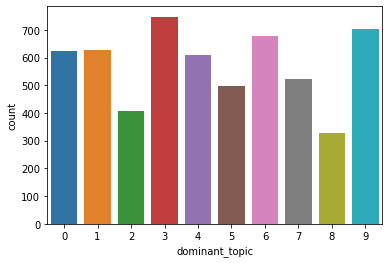

In [69]:


import seaborn as sns
sns.countplot(df_document_topic.dominant_topic)

**Gold Standard**

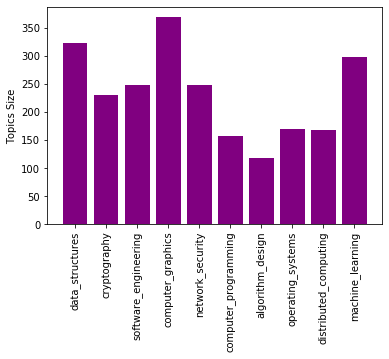

In [70]:
import matplotlib.pyplot as plt
gs=clean_corpus['gs']
gs.pop('o')
gs_termcounts=[]
core_concepts=[]
for core_concept in gs:
    core_concepts.append(core_concept)
    gs_termcounts.append(len(gs[core_concept]))
plt.bar(core_concepts,gs_termcounts,width=0.8,color='purple')
plt.xticks(rotation=90)
plt.ylabel("Topics Size")
plt.show()

In [71]:
label=labeled_corpus['label']
filtered_labels=[]
for i in range(len(vocab)):
    id,word=id2word[i]
    index=terms_list.index(word)
    filtered_labels.append(label[index])

**Clusters Formation**

In [72]:
clusters=[]
for i in range(10):
    cluster=[]
    for j in range(len(vocab)):
        row=df_document_topic_term.loc[j]
        if(row['dominant_topic']==i):
            cluster.append(row['terms'])
    clusters.append(cluster)

In [73]:
#determining measures of all terms
terms_saliency={}
for term in vocab:
    index=word2id[term]
    terms_saliency[term]=saliency[index]
df_terms=pd.DataFrame(vocab,columns=['Terms'])
df_terms['TF-IDF']=new_tfidf
df_terms['term counts']=word_counts
df_terms['Saliency']=terms_saliency.values()
print(df_terms)

                            Terms    TF-IDF  term counts  Saliency
0                        analysis  1.585986         1158 -0.078970
1                      artificial  1.411155           82 -0.006101
2           artificial_bee_colony  2.374871           12 -0.000455
3                cross_validation  4.452883           15 -0.000319
4                      explaining  1.619230           15 -0.000808
...                           ...       ...          ...       ...
4834           viable_alternative  1.187435            3 -0.000236
4835                  trace_table  0.848168            5 -0.000547
4836          rule-based_approach  1.187435            4 -0.000420
4837          software_management  1.187435            3 -0.000236
4838  computer_network_technology  2.968589            5 -0.000214

[4839 rows x 4 columns]


**Evaluation (With and Without Gold Standard)**

In [74]:
features_matrix=model.topic_word_
features_matrix=features_matrix.transpose()

In [75]:
#calculating cosine similarity between terms feature vectors (feature vectors= topic-term probabilities)
from numpy import dot
from numpy.linalg import norm
import scipy.spatial.distance as distance
a=b=features_matrix
cos_sim = dot(a, b.transpose())/(norm(a)*norm(b))
print(cos_sim)

[[3.02896460e-02 2.48476183e-03 1.77270955e-04 ... 1.02088301e-04
  6.86920543e-05 9.05013244e-05]
 [2.48476183e-03 6.08211698e-04 3.99926923e-05 ... 1.22603847e-05
  3.12507742e-07 3.14985786e-07]
 [1.77270955e-04 3.99926923e-05 5.58397582e-06 ... 2.97406352e-08
  2.63161757e-08 2.87942202e-08]
 ...
 [1.02088301e-04 1.22603847e-05 2.97406352e-08 ... 4.36554782e-06
  1.86860852e-08 2.11641298e-08]
 [6.86920543e-05 3.12507742e-07 2.63161757e-08 ... 1.86860852e-08
  2.24550171e-06 2.99139312e-06]
 [9.05013244e-05 3.14985786e-07 2.87942202e-08 ... 2.11641298e-08
  2.99139312e-06 3.98508898e-06]]


In [76]:
#computing silhouette of samples composed of features (freq,tf-idf,saliency)
y_pred_1=df_document_topic_term.dominant_topic.tolist()
from sklearn.metrics import silhouette_score
silhouette_1=silhouette_score(features_matrix,y_pred_1)
print("The silhouette measure according to Euclidean distance: ",silhouette_1)
silhouette_2=silhouette_score(cos_sim,y_pred_1)
print("The silhouette measure according to cosine distance: ",silhouette_2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


The silhouette measure according to Euclidean distance:  0.15110845411254137


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


The silhouette measure according to cosine distance:  -0.08028220872728539


In [77]:
from sklearn.metrics import calinski_harabasz_score
#computing calinski of samples composed of features (freq,tf-idf,saliency)
calinski_harabasz_score_1=calinski_harabasz_score(features_matrix,y_pred_1)
print("The calinski measure according to Euclidean distance: ",calinski_harabasz_score_1)
calinski_harabasz_score_2=calinski_harabasz_score(cos_sim,y_pred_1)
print("The calinski measure according to cosine distance: ",calinski_harabasz_score_2)

The calinski measure according to Euclidean distance:  60.85001953589344
The calinski measure according to cosine distance:  11.344271965398857


In [78]:
filtered_labels[4208]='o'
y_pred=df_document_topic_term['dominant_topic']

In [79]:
labels_gs=[]
dictionary_label={'operating_systems':0,'network_security':1,'machine_learning':2,'data_structures':3,'cryptography':4,'distributed_computing':5,'computer_programming':6,'software_engineering':7,'computer_graphics':8,'algorithm_design':9,'o':10}
for label in filtered_labels:
    labels_gs.append(dictionary_label[label])
df_document_topic_term['gs label'] =labels_gs
df_document_topic_term.head()
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(labels_gs,df_document_topic_term['dominant_topic'])
print(conf_matrix)

[[  9   6  12  13  11   8   7  12   8   5   0]
 [ 11  17  11  14   9   8  14  13  16  15   0]
 [ 19  16  17  20  17  22  17  26  13  22   0]
 [ 14  13  14  26  18  18  18  10  15  16   0]
 [ 13  10   6  11   9  12  15  17   6  11   0]
 [  8  13   6   6  16   6  10   8  12  11   0]
 [  6   6   4  19   8   7  11   7  14   9   0]
 [ 11  14  11  15  12  14  17  14  14   6   0]
 [ 18  23  16  29  19  24  24  25  19  30   0]
 [  4   6   8   4   5   9  10   8   6   8   0]
 [342 342 317 403 349 302 423 371 374 326   0]]


In [80]:
from sklearn.metrics import f1_score, precision_recall_fscore_support
p_macro, r_macro, f_macro, support_macro \
    = precision_recall_fscore_support(y_true=labels_gs, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average='macro')

p_micro, r_micro, f_micro, support_micro\
    = precision_recall_fscore_support(y_true=labels_gs, y_pred=y_pred, labels=[0,1,2,3,4,5,6,7,8,9,10], average='micro')

print('macro: p {}, r {}, f1 {}'.format(p_macro, r_macro, f_macro))

print('micro: p {}, r {}, f1 {}'.format(p_micro, r_micro, f_micro))



macro: p 0.025313206365096808, r 0.09618857436892264, f1 0.03924672106337595
micro: p 0.028104980367844597, r 0.028104980367844597, f1 0.028104980367844597


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
from sklearn.metrics import adjusted_rand_score
rand_score=adjusted_rand_score(labels_gs,df_document_topic_term['dominant_topic'])
print(rand_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:127: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


2.2610867645756987e-05


**This part is to be updated and continued**

In [82]:
new_docs=[]
for doc in docs:
    new_doc=[]
    for word in doc:
        if(word in vocab):
            new_doc.append(word)
    new_docs.append(new_doc)
new_dtm=[]
for i in range(len(new_docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in new_docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  new_dtm.append(doc_counts)
new_dtm=np.array(new_dtm)

In [83]:
#computing pairwise precision
no_of_pairs=[]
terms=list(terms)
labels=labeled_corpus['label']
for cluster in clusters:
    length=len(cluster)
    val=length*(length-1)/2
    no_of_pairs.append(val)
den=0
for value in no_of_pairs:
    den=den+value
num=0
for cluster in clusters:
    c=len(cluster)
    for i in range(c-1):
        for j in range(i+1,c):
            term1=cluster[i]
            term2=cluster[j]
            index1=terms.index(term1)
            index2=terms.index(term2)
            label1=labels[index1]
            label2=labels[index2]
            if(label1==label2):
                num=num+1
pairwise_precision=num/den
print(pairwise_precision)

0.5549922800448699


In [84]:
pip install gensim==3.8.3

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\__pycache__\\cython.cpython-38.pyc'
Consider using the `--user` option or check the permissions.



  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached Cython-0.29.14-cp38-cp38-win_amd64.whl (1.7 MB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:


In [85]:
model1 = gensim.models.Word2Vec(docs, min_count = 1, 
                              vector_size = 100, window = 5)

INFO:gensim.models.word2vec:collecting all words and their counts
INFO:gensim.models.word2vec:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO:gensim.models.word2vec:collected 8261 word types from a corpus of 124548 raw words and 5746 sentences
INFO:gensim.models.word2vec:Creating a fresh vocabulary
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 8261 unique words (100.0%% of original 8261, drops 0)', 'datetime': '2021-06-07T19:47:13.046069', 'gensim': '4.0.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'prepare_vocab'}
INFO:gensim.utils:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 124548 word corpus (100.0%% of original 124548, drops 0)', 'datetime': '2021-06-07T19:47:13.048064', 'gensim': '4.0.0', 'python': '3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 

In [86]:
#computing topic coherence
import math
from sklearn.metrics.pairwise import cosine_similarity
def topic_coherence(topic):
        TC=0
        N=len(topic)
        for i in range(2,N):
            for j in range(1,i-1):
                cos_similarity=cosine_similarity(model1.wv[topic[i]].reshape(1,-1),model1.wv[topic[j]].reshape(1,-1))
                TC=TC+cos_similarity[0][0]
        Total_combinations=math.factorial(N)/(math.factorial(2)*math.factorial(N-2))
        TC=TC/Total_combinations
        return TC
TCS=[]
for cluster in clusters:
    TC=topic_coherence(cluster)
    TCS.append(TC)
print(TCS)
TC_average=0
for TC in TCS:
    TC_average=TC_average+TC
TC_average=TC_average/10
print(TC_average)

[0.9762617276980662, 0.9748545886312866, 0.9731706826226642, 0.9712078911814731, 0.9738389714357867, 0.9739828408788703, 0.9721177850756996, 0.9732704288942762, 0.9716923367492011, 0.9753922765534038]
0.9735789529720729


In [87]:
word2id = { dictionary[i] : i for i in range(len(dictionary))}
dtm=[]
for i in range(len(docs)):
  doc_counts=[]
  for j in range(len(dictionary)):
    if (dictionary[j] in docs[i]):
      doc_counts.append(1)
    else:
      doc_counts.append(0)
  dtm.append(doc_counts)
dtm=np.array(dtm)
print(dtm.shape)
print(dtm.sum())
def generate_co_occurrence_matrix(DTM):
  co_occurrence_matrix=np.dot(DTM.transpose(),DTM)
  return co_occurrence_matrix
co_occurrence_matrix=generate_co_occurrence_matrix(dtm)

(5746, 4839)
92143


In [88]:
#TC-LCP
D=len(docs)
def pair_prob(term1,term2,matrix):
  i=word2id[term1]
  j=word2id[term2]
  nij=matrix[i][j]
  prob=nij/D
  return prob
def single_prob(term,DTM):
  j=word2id[term]
  nj=0
  for i in range(D):
    nj=nj+DTM[i][j]
  prob=nj/D
  return prob
def topic_coherence_2(topic,dtm,co_occurrence_matrix):
        TC=0
        N=len(topic)
        for i in range(2,N):
            for j in range(1,i-1):
                abs=0.00005
                prob_1=pair_prob(topic[i],topic[j],co_occurrence_matrix)
                prob_2=single_prob(topic[j],dtm)
                TC=TC+math.log((prob_1+abs)/prob_2)
        Total_combinations=math.factorial(N)/(math.factorial(2)*math.factorial(N-2))
        TC=TC/Total_combinations
        return TC
TCS=[]
for cluster in clusters:
    TC=topic_coherence_2(cluster,dtm,co_occurrence_matrix)
    TCS.append(TC)
print(TCS)

[-3.656890964231415, -3.6865281487269423, -3.6593542710219125, -3.4879403022420465, -3.716810202061605, -3.7208163304519095, -3.5545687830779227, -3.6129174181642294, -3.6838611517221223, -3.577560409315202]


In [89]:
TC_average=0
for TC in TCS:
    TC_average=TC_average+TC
TC_average=TC_average/10
print(TC_average)

-3.6357247981015304
